# Test Cascade Network and Convolution results

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
from keras.models import Model# , Sequential
from keras.layers import Input

from blusky.wavelets.morlet2d import Morlet2D
from blusky.transforms.cascade_2d import Cascade2D


wav1 = Morlet2D(sample_rate=0.004,
              center_frequency=90.,
              bandwidth=(50.,25.),
              crop=3.5,
              taper=False)
wav2 = Morlet2D(sample_rate=0.004,
              center_frequency=45.,
              bandwidth=(40.,20),
              crop=3.5,
              taper=False)
wav3 = Morlet2D(sample_rate=0.004,
              center_frequency=22.5,
              bandwidth=(20,10.),
              crop=3.5,
              taper=False)

inp = Input(shape=(99,99,1))
cascade = Cascade2D("none", 0, depth=3, angles=(0.0, 45., 90.), wavelets=[wav1, wav2, wav3])
# create the transform
result = cascade.transform(inp)
model = Model(inputs=inp, outputs=result)
model.summary()

Using TensorFlow backend.
W0823 20:20:33.904244 4455941568 deprecation_wrapper.py:119] From /Users/bhall/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 20:20:33.918097 4455941568 deprecation_wrapper.py:119] From /Users/bhall/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 20:20:33.942697 4455941568 deprecation.py:323] From /Users/bhall/.edm/envs/blusky/lib/python3.6/site-packages/tensorflow/python/ops/variables.py:2618: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 99, 99, 1)    0                                            
__________________________________________________________________________________________________
depthwise_conv2d_1 (DepthwiseCo (None, 99, 99, 3)    510         input_1[0][0]                    
__________________________________________________________________________________________________
depthwise_conv2d_2 (DepthwiseCo (None, 99, 99, 3)    510         input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 99, 99, 3)    0           depthwise_conv2d_1[0][0]         
                                                                 depthwise_conv2d_2[0][0]         
__________

In [3]:
from os import path
import blusky.datasets as datasets
from PIL import Image
import numpy as np

# imgs = []
# #for label in ["chaotic", "fault", "salt", "horizon"]:
# for label in ["chaotic"]:

#     for im in range(0, 1):
#         data = path.join(
#             path.join(path.dirname(datasets.__file__), "test_tiles"),
#             "{}{}.png".format(label, im),
#         )
#         data = np.array(Image.open(data)).astype(np.float32)
#         data /= np.max(data)

#         imgs.append(data)

img_path = path.join(path.dirname(datasets.__file__), "test_tiles/chaotic0.png")        
data = np.array(Image.open(img_path)).astype(np.float32)
data /= np.max(data)

imgs = np.array([data])
imgs.shape = list(imgs.shape) + [1]

# img_path = path.join(path.dirname(datasets.__file__), "test_tiles/chaotic2.png")
# data = np.array(Image.open(img_path)).astype(np.float32)


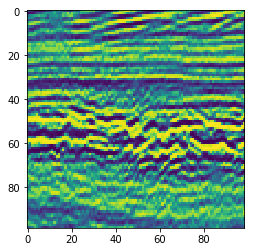

In [4]:

plt.imshow(imgs[0][:,:,0])

In [5]:
result = model.predict(imgs)
result[0].shape

W0823 20:20:40.320498 4455941568 deprecation_wrapper.py:119] From /Users/bhall/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0823 20:20:40.325125 4455941568 deprecation_wrapper.py:119] From /Users/bhall/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0823 20:20:40.327008 4455941568 deprecation_wrapper.py:119] From /Users/bhall/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



(1, 99, 99, 3)

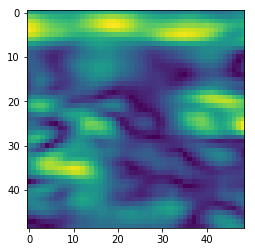

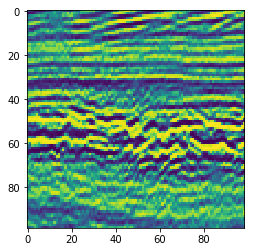

In [6]:
i = 0

plt.figure()
plt.imshow(result[i][0,25:-25,25:-25,2])
plt.show()


plt.figure()
plt.imshow(imgs[i][:,:,0])
plt.show()

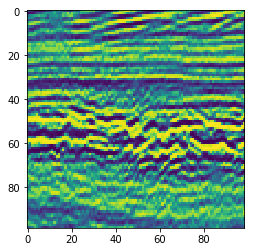

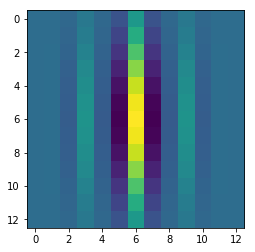

(99, 99)

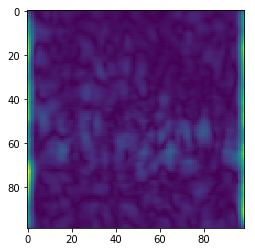

In [7]:
from scipy.signal import convolve2d

wav1_k = wav1.kernel(0.0)
wav2_k = wav2.kernel(45.0)
wav3_k = wav3.kernel(90.0)

image_index = 0
x = imgs[image_index,:,:,0]
plt.imshow(x)
plt.show()
conv = np.abs(convolve2d(x, wav1_k, mode='same'))

plt.imshow(wav1_k.real)
plt.show()
plt.imshow(conv)
conv.shape

where is this in the output of the model?

(99, 99)

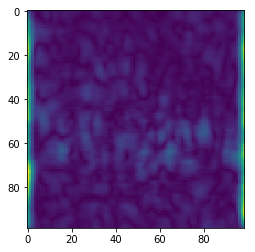

In [8]:
endpoint = 0
angle = 0

cnn_conv = result[endpoint][image_index,:,:,angle]
plt.imshow(cnn_conv)
cnn_conv.shape

In [9]:
np.testing.assert_almost_equal(conv, 
                               cnn_conv,
                               err_msg='Convolution does not match test values.')

Try the second order transform.

In [10]:
conv2 = np.abs(convolve2d(conv, wav2_k, mode='same'))


(99, 99)

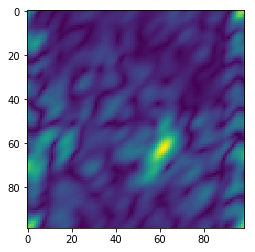

In [11]:
plt.imshow(conv2)
conv.shape

(99, 99)

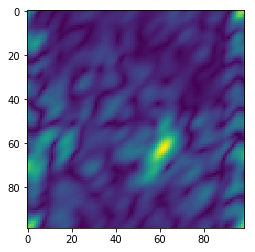

In [21]:
endpoint = 3
angle_index = 1

cnn_conv2 = result[endpoint][image_index,:,:,angle_index]
plt.imshow(cnn_conv2)
cnn_conv.shape

In [22]:
np.testing.assert_almost_equal(conv2, 
                               cnn_conv2,
                               err_msg='Convolution does not match test values.')

Test third order transform

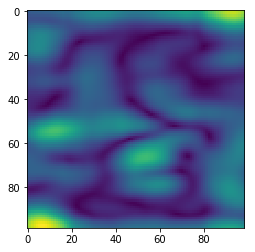

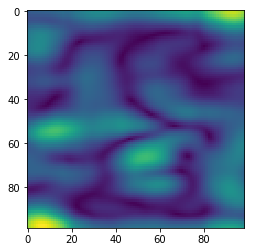

In [33]:
conv3 = np.abs(convolve2d(conv2, wav3_k, mode='same'))
plt.imshow(conv3)
plt.show()

angle_index = 5
cnn_conv3 = result[6][image_index,:,:,angle_index]

plt.imshow(cnn_conv3)
plt.show()

np.testing.assert_almost_equal(conv3, 
                               cnn_conv3,
                               err_msg='Convolution does not match test values.')

In [15]:
result[1].shape

(1, 99, 99, 3)

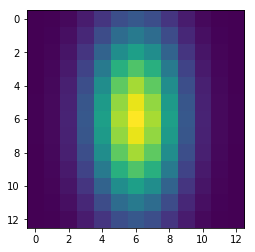

In [30]:
dirac = np.zeros((99,99))
dirac[50,50] = 1.0

conv_dirac = np.abs(convolve2d(dirac, wav1_k, mode='same'))
plt.imshow(np.abs(wav1_k))


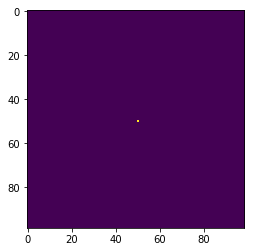

(99, 99)

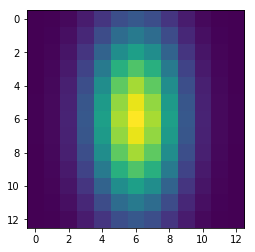

In [34]:
plt.imshow(dirac[:,:])
plt.show()

conv_dirac_crop = conv_dirac[44:57,44:57]
plt.imshow(conv_dirac_crop)
conv.shape

In [43]:
np.testing.assert_almost_equal(np.abs(wav1_k), 
                               conv_dirac_crop,
                               err_msg='Convolution does not match test values.')

Now, feed the dirac function to the cascade.

In [63]:
# define the test cascade. use
cascade = Cascade2D("none", 0, depth=3, angles=(0.0,), wavelets=[wav1])
# create the transform
my_transform = cascade.transform(inp)
model = Model(inputs=inp, outputs=my_transform)

imgs = np.array([dirac])
imgs.shape = list(imgs.shape) + [1]
result = model.predict(imgs)

cnn_conv_dirac = result[image_index,:,:,angle]
cnn_conv_dirac_crop = cnn_conv_dirac[44:57,44:57]

In [64]:
np.testing.assert_almost_equal(np.abs(wav1_k), 
                               cnn_conv_dirac_crop,
                               err_msg='Convolution does not match test values.')

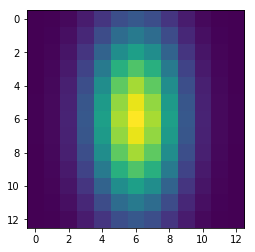

In [56]:
plt.imshow(cnn_conv_dirac_crop)

In [60]:
result.shape

(1, 99, 99, 2)